In [8]:
import os
import gc

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from skimage.io import imread
from skimage.transform import resize

from sklearn.model_selection import train_test_split

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import optimizers

In [29]:
IMG_SHAPE = 255

In [9]:
# Paths: For local machine
data_dir = 'C:/Users/Nick/Desktop/stock images/train'
categories = ['chan_down', 'chan_up', 'doub_bot', 'doub_top', 'hs', 'tri', 'wed_down', 'wed_up']

In [10]:
def mapto1hot(ytrain, yval, ytest):
    # One hot encoding for the number of categories we will be looking at.,
    ytrain_1hot = keras.utils.to_categorical(ytrain, num_classes = len(categories))
    yval_1hot = keras.utils.to_categorical(yval, num_classes = len(categories))
    ytest_1hot = keras.utils.to_categorical(ytest, num_classes = len(categories))
    
    return ytrain_1hot, yval_1hot, ytest_1hot

In [18]:
def convert_images(data: list, labels: list):
    for category_idx, category in enumerate(categories):
        count = 0
        
        for file in os.listdir(data_dir + '/' + category):
            image = imread(data_dir + '/' + category + '/' + file)
            image = resize(image, (IMG_SHAPE, IMG_SHAPE))
            data.append(image)
            labels.append(category_idx)
            count += 1
            if count > 500:
                break
            
    return data, labels

In [19]:
data = []
labels = []

In [20]:
data, labels = convert_images(data, labels)

In [21]:
data1 = np.asarray(data)
labels1 = np.asarray(labels)

In [22]:
# Split data into train and test sets using 42 to make reproducable results
xtrain, xtest, ytrain, ytest = train_test_split(data1, labels1, test_size=0.2, random_state=42, shuffle=True, stratify=labels1)

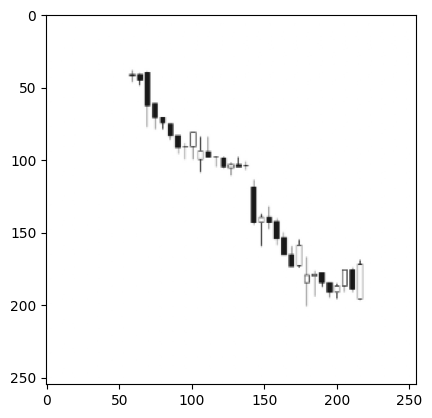

In [23]:
# Test fucntion to see how the images work with this pixal count
for _ in range(1):
    plt.imshow(xtrain[np.random.randint(len(xtrain))])
    plt.show()

In [24]:
# Normalize the data by dividing 1 by 255 (rgb value)\n",
xtrain = xtrain/255
xtest = xtest/255

# Create validation set
xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain, test_size=0.2)

In [26]:
ytrain_1hot, yval_1hot, ytest_1hot = mapto1hot(ytrain, yval, ytest)

In [31]:
layers = [
    Flatten(input_shape=(IMG_SHAPE, IMG_SHAPE, 4)),
    tf.keras.layers.Dense(100, activation='relu'), 
    tf.keras.layers.MaxPooling1D(pool_size=2), # hidden layer
    tf.keras.layers.Dense(len(categories), activation='softmax') # output layer
]

model = Sequential(layers)

#refer to https://www.tensorflow.org/tutorials/keras/classification tutorial to check on how to use compile function
model.compile(optimizer=tf.keras.optimizers.SGD(0.01), # SGD optimizer with learning rate of 0.01
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# This will start the training and save each epoch output in the history list.
history = model.fit(xtrain, ytrain_1hot, batch_size=16, epochs=10, validation_data=(xval, yval_1hot))

Epoch 1/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - accuracy: 0.1079 - loss: 2.0801 - val_accuracy: 0.1059 - val_loss: 2.0802
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.1122 - loss: 2.0794 - val_accuracy: 0.1059 - val_loss: 2.0806
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.1297 - loss: 2.0794 - val_accuracy: 0.1059 - val_loss: 2.0809
Epoch 4/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.1486 - loss: 2.0786 - val_accuracy: 0.1059 - val_loss: 2.0809
Epoch 5/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.1205 - loss: 2.0792 - val_accuracy: 0.1059 - val_loss: 2.0812
Epoch 6/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.1272 - loss: 2.0794 - val_accuracy: 0.1059 - val_loss: 2.0814
Epoch 7/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.1303 - loss: 2.0794 - val_accuracy: 0.1059 - val_loss: 2.0814
Epoch 8/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - accuracy: 0.1274 - loss: 2.0794 - val_accu

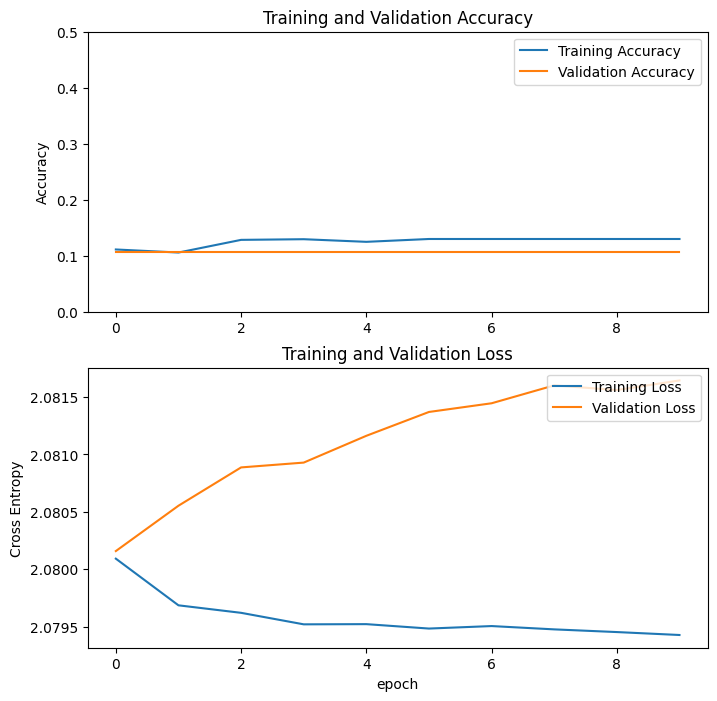

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.ylabel('Accuracy')
plt.ylim([0,0.5])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [38]:
gc.collect()

42455